# DSC540 Project 3

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### Jacob Ledesma

**Honor Pledge:**  
I pledge on my honor that I, **Jacob Ledesma**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable]
(PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [73]:
import sklearn
sklearn.__version__

'1.0.2'

In [74]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [145]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tabulate import tabulate

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [76]:
df = pd.read_csv('gas_emissions.csv')

In [77]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


#### Is there any missing data?

In [78]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [79]:
df.loc[df['CO']>3,'AP'].mean()

1015.690017349063

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

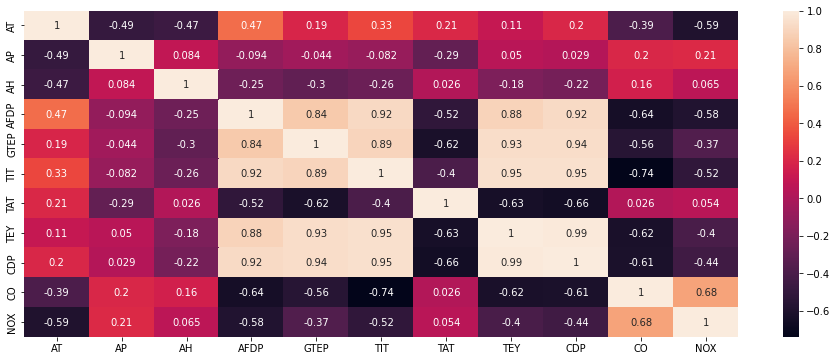

In [80]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)

There are 7 combinations of variables with high correlation (>|0.9|):
* TIT & AFDP - 0.92
* TEY & GTEP - 0.93
* TEY & TIT - 0.95
* CDP & AFDP - 0.92
* CDP & GTEP - 0.94
* CDP & TIT - 0.95
* CDP & TEY - 0.99

#### Create a scatter plot of 'TEY' vs 'CDP'

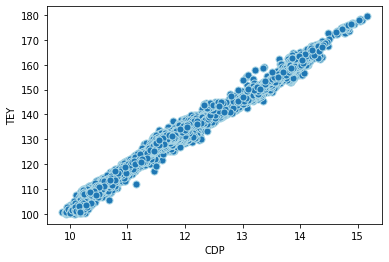

In [81]:
df.plot.scatter('CDP', 'TEY', s=50, edgecolor='lightblue')

#### Create histograms for CO and NOX.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda75110430>]],
      dtype=object)

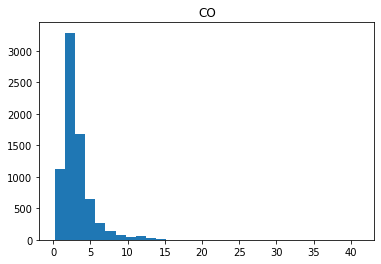

In [82]:
df.hist(column='CO', grid=False, bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda7508e250>]],
      dtype=object)

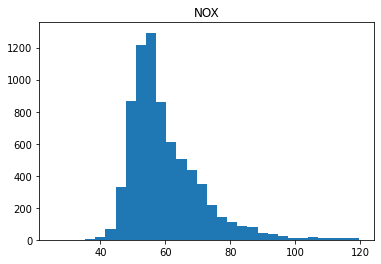

In [83]:
df.hist(column='NOX', grid=False, bins=30)

#### Create a sctter plot of CO vs NOX.

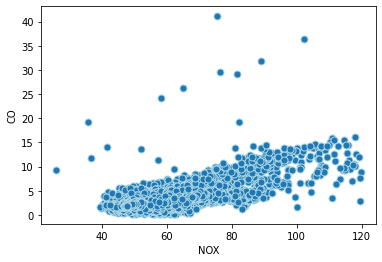

In [84]:
df.plot.scatter('NOX', 'CO', s=50, edgecolor='lightblue')

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [85]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [152]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [88]:
X_train.shape

(5316, 9)

In [89]:
X_val.shape

(1329, 9)

In [90]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
linreg = LinearRegression().fit(X_train, y_train)

In [93]:
trainpred = linreg.predict(X_train)
metrics.r2_score(y_train, trainpred)

0.6640090820784397

R2 score for the model on training data is .66

In [94]:
valpred = linreg.predict(X_val)
metrics.r2_score(y_val, valpred)

0.646343190818214

R2 score for the model on validation data is .64

In [95]:
mse = metrics.mean_squared_error(y_train, trainpred)
rmse = np.sqrt(mse)
print(rmse)

1.2720122104103535


RMSE on training data is 1.27

In [96]:
mse = metrics.mean_squared_error(y_val, valpred)
rmse = np.sqrt(mse)
print(rmse)

1.3884894690085987


RMSE on validation data is 1.39

## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [99]:
estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [100]:
trainpreds = estimator.predict(X_train)
metrics.r2_score(y_train, trainpreds)

0.9635412068046666

In [101]:
valpreds = estimator.predict(X_val)
metrics.r2_score(y_val, valpreds)

0.7558012206331827

In [102]:
mse = metrics.mean_squared_error(y_train, trainpreds)
rmse = np.sqrt(mse)
print(rmse)

0.419014117669241


In [103]:
mse = metrics.mean_squared_error(y_val, valpreds)
rmse = np.sqrt(mse)
print(rmse)

1.1537808394478866


Training and validation R2 scores are not close (~0.21 apart) This appears to be the model overfitting to the test data. Hyperparameter tuning to reduce the gap:

In [104]:
estimator = RandomForestRegressor(n_estimators=250, max_depth=4, min_samples_split=50, random_state=RANDOM_STATE)
estimator.fit(X_train, y_train)
trainpreds = estimator.predict(X_train)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds))
valpreds = estimator.predict(X_val)
print('validation R2 score: ', metrics.r2_score(y_val, valpreds))

training R2 score:  0.7951437753565359
validation R2 score:  0.7394722549138324


After hyperparameter tuning of n_estimators, max_depth, and min_samples_split the difference in R2 score is ~0.06

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [105]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [106]:
estimator = SVR(kernel='linear')
estimator.fit(X_train, y_train)
trainpreds = estimator.predict(X_train)
valpreds = estimator.predict(X_val)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

training R2 score:  0.6244073289252593 
 validation R2 score:  0.6021447054947482 
 training RMSE:  1.3448878366234214 
 validation RMSE:  1.472699532649528


### Polynomial Kernel SVM Regressor

In [107]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')
estimator.fit(X_train, y_train)
trainpreds = estimator.predict(X_train)
valpreds = estimator.predict(X_val)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

training R2 score:  0.7404852376508422 
 validation R2 score:  0.7310487212257795 
 training RMSE:  1.1179143857689038 
 validation RMSE:  1.21084453183651


### RBF Kernel SVM Regressor

In [108]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')
estimator.fit(X_train, y_train)
trainpreds = estimator.predict(X_train)
valpreds = estimator.predict(X_val)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

training R2 score:  0.7653225070588423 
 validation R2 score:  0.7476173201040637 
 training RMSE:  1.0630733502205556 
 validation RMSE:  1.1729550025939748


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid = {
    'C': [1, 10, 100, 1000], 
    'gamma': [0.001, 0.01, 0.1, 1],
    }
gs = GridSearchCV(estimator=SVR(kernel='rbf'), param_grid=grid)

In [43]:
gs.fit(X_train, y_train)
gs.best_params_

{'C': 1000, 'gamma': 0.01}

In [44]:
estimator = SVR(kernel='rbf', C=1000, gamma=0.01)
estimator.fit(X_train, y_train)
trainpreds = estimator.predict(X_train)
valpreds = estimator.predict(X_val)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

training R2 score:  0.7922405098708589 
 validation R2 score:  0.7568500533368814 
 training RMSE:  1.0002485869512074 
 validation RMSE:  1.1513004313829738


## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain. 


In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


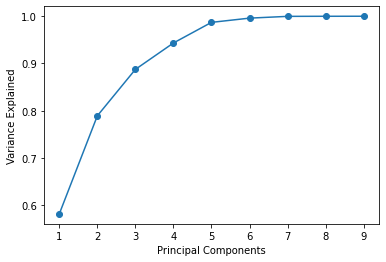

In [111]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [112]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [113]:
estimator = LinearRegression()
estimator.fit(X_train_pca2, y_train)
trainpreds = estimator.predict(X_train_pca2)
valpreds = estimator.predict(X_val_pca2)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

training R2 score:  0.6557906042002006 
 validation R2 score:  0.6333206399655549 
 training RMSE:  1.2874751982855395 
 validation RMSE:  1.413822244602062


**RF Regression with PCA transformed data**

In [114]:
estimator = RandomForestRegressor(n_estimators=250, max_depth=5, min_samples_split=50, random_state=RANDOM_STATE)
estimator.fit(X_train_pca2, y_train)
trainpreds = estimator.predict(X_train_pca2)
valpreds = estimator.predict(X_val_pca2)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

training R2 score:  0.7951675778698483 
 validation R2 score:  0.7234216919446337 
 training RMSE:  0.9931774751814639 
 validation RMSE:  1.227893317514672


**SVM Regression with PCA transformed data**

In [115]:
estimator = SVR(kernel='rbf', C=1000, gamma=0.01)
estimator.fit(X_train_pca2, y_train)
trainpreds = estimator.predict(X_train_pca2)
valpreds = estimator.predict(X_val_pca2)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

training R2 score:  0.7852916421421293 
 validation R2 score:  0.7520178174537542 
 training RMSE:  1.016838511681673 
 validation RMSE:  1.162684323953344


Looking at the R2 scores across the PCA transformed models and the non-transformed models there does not seem to be much difference. Same goes with the RMSE values, the differences are only about 0.01 in either direction.

## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [116]:
from sklearn.preprocessing import Binarizer

In [117]:
binarizer = Binarizer(threshold=3)

In [118]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [119]:
y_train_cat = pd.Series(y_train_cat)

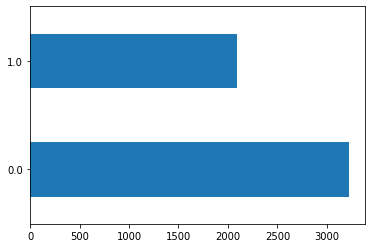

In [120]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [121]:
from sklearn.svm import SVC

In [122]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1 

In [123]:
grid = {
    'C': [1, 10, 100, 1000], 
    'gamma': [0.001, 0.01, 0.1, 1],
    }
gs = GridSearchCV(estimator = SVC(kernel ='rbf'), param_grid=grid)
gs.fit(X_train, y_train_cat)
gs.best_params_

KeyboardInterrupt: ignored

In [124]:
estimator = SVC(kernel ='rbf', C=1, gamma=1)
estimator.fit(X_train, y_train_cat)
predictions = estimator.predict(X_val)
print(metrics.confusion_matrix(y_val_cat, predictions))
recall = recall_score(y_val_cat, predictions, average='micro')
spec = recall_score(y_val_cat, predictions, pos_label = 0)
pres = precision_score(y_val_cat, predictions, average='macro')
bal = balanced_accuracy_score(y_val_cat, predictions)
f1 = f1_score(y_val_cat, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

[[762  50]
 [ 68 449]]
Recall = 0.9112114371708051
Specificity = 0.9384236453201971
Precision = 0.9089359441775117
Balanced Accuracy = 0.9034477994492668
F1 Score = 0.9109115851305024


#### SVC Model 2

In [125]:
grid = {
    'C': [1, 10, 100, 1000], 
    'gamma': [0.001, 0.01, 0.1, 1],
    }
gs = GridSearchCV(estimator = SVC(kernel ='rbf'), param_grid=grid)
gs.fit(X_train_pca2, y_train_cat)
gs.best_params_

KeyboardInterrupt: ignored

In [126]:
estimator = SVC(kernel ='rbf', C=1, gamma=1)
estimator.fit(X_train_pca2, y_train_cat)
predictions = estimator.predict(X_val_pca2)
print(metrics.confusion_matrix(y_val_cat, predictions))
recall = recall_score(y_val_cat, predictions, average='micro')
spec = recall_score(y_val_cat, predictions, pos_label = 0)
pres = precision_score(y_val_cat, predictions, average='macro')
bal = balanced_accuracy_score(y_val_cat, predictions)
f1 = f1_score(y_val_cat, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

[[764  48]
 [ 70 447]]
Recall = 0.9112114371708051
Specificity = 0.9408866995073891
Precision = 0.9095487246566383
Balanced Accuracy = 0.9027450905660737
F1 Score = 0.9108397063026021


## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

Improving regresssion could be achieved through some hyperparameter tuning of the regression models used. One possibilities:
- Linear Regression, increase n-jobs from none to 100

In [127]:
estimator = LinearRegression(n_jobs=100)
estimator.fit(X_train_pca2, y_train)
trainpreds = estimator.predict(X_train_pca2)
valpreds = estimator.predict(X_val_pca2)
print('training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

training R2 score:  0.6557906042002006 
 validation R2 score:  0.6333206399655549 
 training RMSE:  1.2874751982855395 
 validation RMSE:  1.413822244602062


Seems to speed up the model output but no effect on R2 or RMSE

Another possibility:
- SVR Regression with epsilon = 0.25 instead of default 0.1

In [134]:
estimator = SVR(kernel='rbf', C=1000, gamma=0.01, epsilon=0.25)
estimator.fit(X_train_pca2, y_train)
trainpreds = estimator.predict(X_train_pca2)
valpreds = estimator.predict(X_val_pca2)
print(' training R2 score: ', metrics.r2_score(y_train, trainpreds), '\n', 
      'validation R2 score: ', metrics.r2_score(y_val, valpreds), '\n',
      'training RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, trainpreds)), '\n', 
      'validation RMSE: ', np.sqrt(metrics.mean_squared_error(y_val, valpreds)))

 training R2 score:  0.7857053816007232 
 validation R2 score:  0.752684608089259 
 training RMSE:  1.0158583237456014 
 validation RMSE:  1.1611201211137916


With the inscrease epsilon there is a slight increase in R2 score and slight decrease in RMSE, however difference is only in the magnintude of .0001

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

RF Classifier model

In [136]:
rfc = RandomForestClassifier(max_depth=None, min_samples_split=50, n_estimators=250)
rfc.fit(X_train_pca2, y_train_cat)
predictions = rfc.predict(X_val_pca2)
recall = recall_score(y_val_cat, predictions, average='micro')
spec = recall_score(y_val_cat, predictions, pos_label = 0)
pres = precision_score(y_val_cat, predictions, average='macro')
bal = balanced_accuracy_score(y_val_cat, predictions)
f1 = f1_score(y_val_cat, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.9119638826185101
Specificity = 0.9445812807881774
Precision = 0.91117340857678
Balanced Accuracy = 0.9026581452296787
F1 Score = 0.9115035158434073


One way of improving performance in RF classifier, changing the default criterion from 'gini' to 'entropy'. Implemented:

In [137]:
rfc = RandomForestClassifier(max_depth=None, criterion='entropy', min_samples_split=50, n_estimators=250)
rfc.fit(X_train_pca2, y_train_cat)
predictions = rfc.predict(X_val_pca2)
recall = recall_score(y_val_cat, predictions, average='micro')
spec = recall_score(y_val_cat, predictions, pos_label = 0)
pres = precision_score(y_val_cat, predictions, average='macro')
bal = balanced_accuracy_score(y_val_cat, predictions)
f1 = f1_score(y_val_cat, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.9127163280662152
Specificity = 0.9433497536945813
Precision = 0.9114808272756388
Balanced Accuracy = 0.9039766176596697
F1 Score = 0.9123148550582336


F1 Score improved with entropy as the RF criterion from .911 to .912

Using gradient boosting model:

In [139]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_pca2, y_train_cat)
predictions = gbc.predict(X_val_pca2)
recall = recall_score(y_val_cat, predictions, average='micro')
spec = recall_score(y_val_cat, predictions, pos_label = 0)
pres = precision_score(y_val_cat, predictions, average='macro')
bal = balanced_accuracy_score(y_val_cat, predictions)
f1 = f1_score(y_val_cat, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.9119638826185101
Specificity = 0.9396551724137931
Precision = 0.9098886520812492
Balanced Accuracy = 0.9040635629960648
F1 Score = 0.9116489334079181


Improve GB model performance with n_estimators = 250 as opposed to default of 100 

In [143]:
gbc = GradientBoostingClassifier(n_estimators=250)
gbc.fit(X_train_pca2, y_train_cat)
predictions = gbc.predict(X_val_pca2)
recall = recall_score(y_val_cat, predictions, average='micro')
spec = recall_score(y_val_cat, predictions, pos_label = 0)
pres = precision_score(y_val_cat, predictions, average='macro')
bal = balanced_accuracy_score(y_val_cat, predictions)
f1 = f1_score(y_val_cat, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.9142212189616253
Specificity = 0.9384236453201971
Precision = 0.9115572906387341
Balanced Accuracy = 0.9073162714028451
F1 Score = 0.9139991170398819


With the increase in n_estimators there was a modest increase in the F1 score from .911 to .913

## Q10 [10]



- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



Best Regression Models:

In [160]:
estimator = SVR(kernel='rbf', C=1000, gamma=0.01, epsilon=0.25)
estimator.fit(X_train, y_train)
testpreds = estimator.predict(X_test)
estimator2 = RandomForestRegressor(n_estimators=250, max_depth=5, min_samples_split=50, random_state=RANDOM_STATE)
estimator2.fit(X_train, y_train)
testpreds2 = estimator.predict(X_test)
results = {'Metric':['R^2', 'RMSE',],
        'SVR(rbf)':[metrics.r2_score(y_test, testpreds), np.sqrt(metrics.mean_squared_error(y_test, testpreds))],
        'RF':[metrics.r2_score(y_test, testpreds2), np.sqrt(metrics.mean_squared_error(y_test, testpreds2))],
        }
    
df = pd.DataFrame(results)
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

SVR test R2 score:  0.5748401522559217
RF test R2 score:  0.5748401522559217
+----+----------+------------+---------+
|    | Metric   |   SVR(rbf) |      RF |
|----+----------+------------+---------|
|  0 | R^2      |    0.57484 | 0.57484 |
|  1 | RMSE     |    1.52174 | 1.52174 |
+----+----------+------------+---------+


Both models SVR and RF seem to be performing the same which is a surprise as I would expect SVR to be outperfroming based on the validation performance.

Best Classification Models:

In [162]:
estimator = SVC(kernel ='rbf', C=1, gamma=1)
estimator.fit(X_train_pca2, y_train_cat)
predictions = estimator.predict(X_test_pca2)
recall = recall_score(y_test_cat, predictions, average='micro')
spec = recall_score(y_test_cat, predictions, pos_label = 0)
pres = precision_score(y_test_cat, predictions, average='macro')
bal = balanced_accuracy_score(y_test_cat, predictions)
f1 = f1_score(y_test_cat, predictions, average='weighted')

gbc = GradientBoostingClassifier(n_estimators=250)
gbc.fit(X_train_pca2, y_train_cat)
predictions = gbc.predict(X_val_pca2)
recall1 = recall_score(y_val_cat, predictions, average='micro')
spec1 = recall_score(y_val_cat, predictions, pos_label = 0)
pres1 = precision_score(y_val_cat, predictions, average='macro')
bal1 = balanced_accuracy_score(y_val_cat, predictions)
f11 = f1_score(y_val_cat, predictions, average='weighted')

results = {'Metric':['Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1 Score'],
        'SCV(rbf)':[recall, spec, pres, bal, f1],
        'GB':[recall1, spec1, pres1, bal1, f11],
        }

df = pd.DataFrame(results)
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+----+-------------------+------------+----------+
|    | Metric            |   SCV(rbf) |       GB |
|----+-------------------+------------+----------|
|  0 | Recall            |   0.917456 | 0.914221 |
|  1 | Specificity       |   0.93576  | 0.938424 |
|  2 | Precision         |   0.91153  | 0.911557 |
|  3 | Balanced Accuracy |   0.910895 | 0.907316 |
|  4 | F1 Score          |   0.917424 | 0.913999 |
+----+-------------------+------------+----------+


SCV is the best classisfication model based on the metrics above compared to the GB model (best from validation) this is surprising given that the validation performance of GB (F1 Score) was slightly higher that the validation F1 score from the SCV model.

- What did you learn in this project? Any suggestions?

I learned how to implement a variety of regression model including new models like Support Vector Machines, also learned how to take numeric data that would typically be used for regression analysis and use it in a classificaion model

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_